그래픽 EDA 세가지 

- histogram
- swarm
- ecdf

실습을 위한 데이터 로드

In [38]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
x = pd.DataFrame(iris.data,columns= iris.feature_names)
y = pd.DataFrame(iris.target, columns = ['species'] )
df = pd.concat([x,y], axis = 1)
df.loc[df.species == 0, 'species'] = 'setosa'
df.loc[df.species == 1, 'species'] = 'versicolor'
df.loc[df.species == 2, 'species'] = 'virginica'
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### histogram

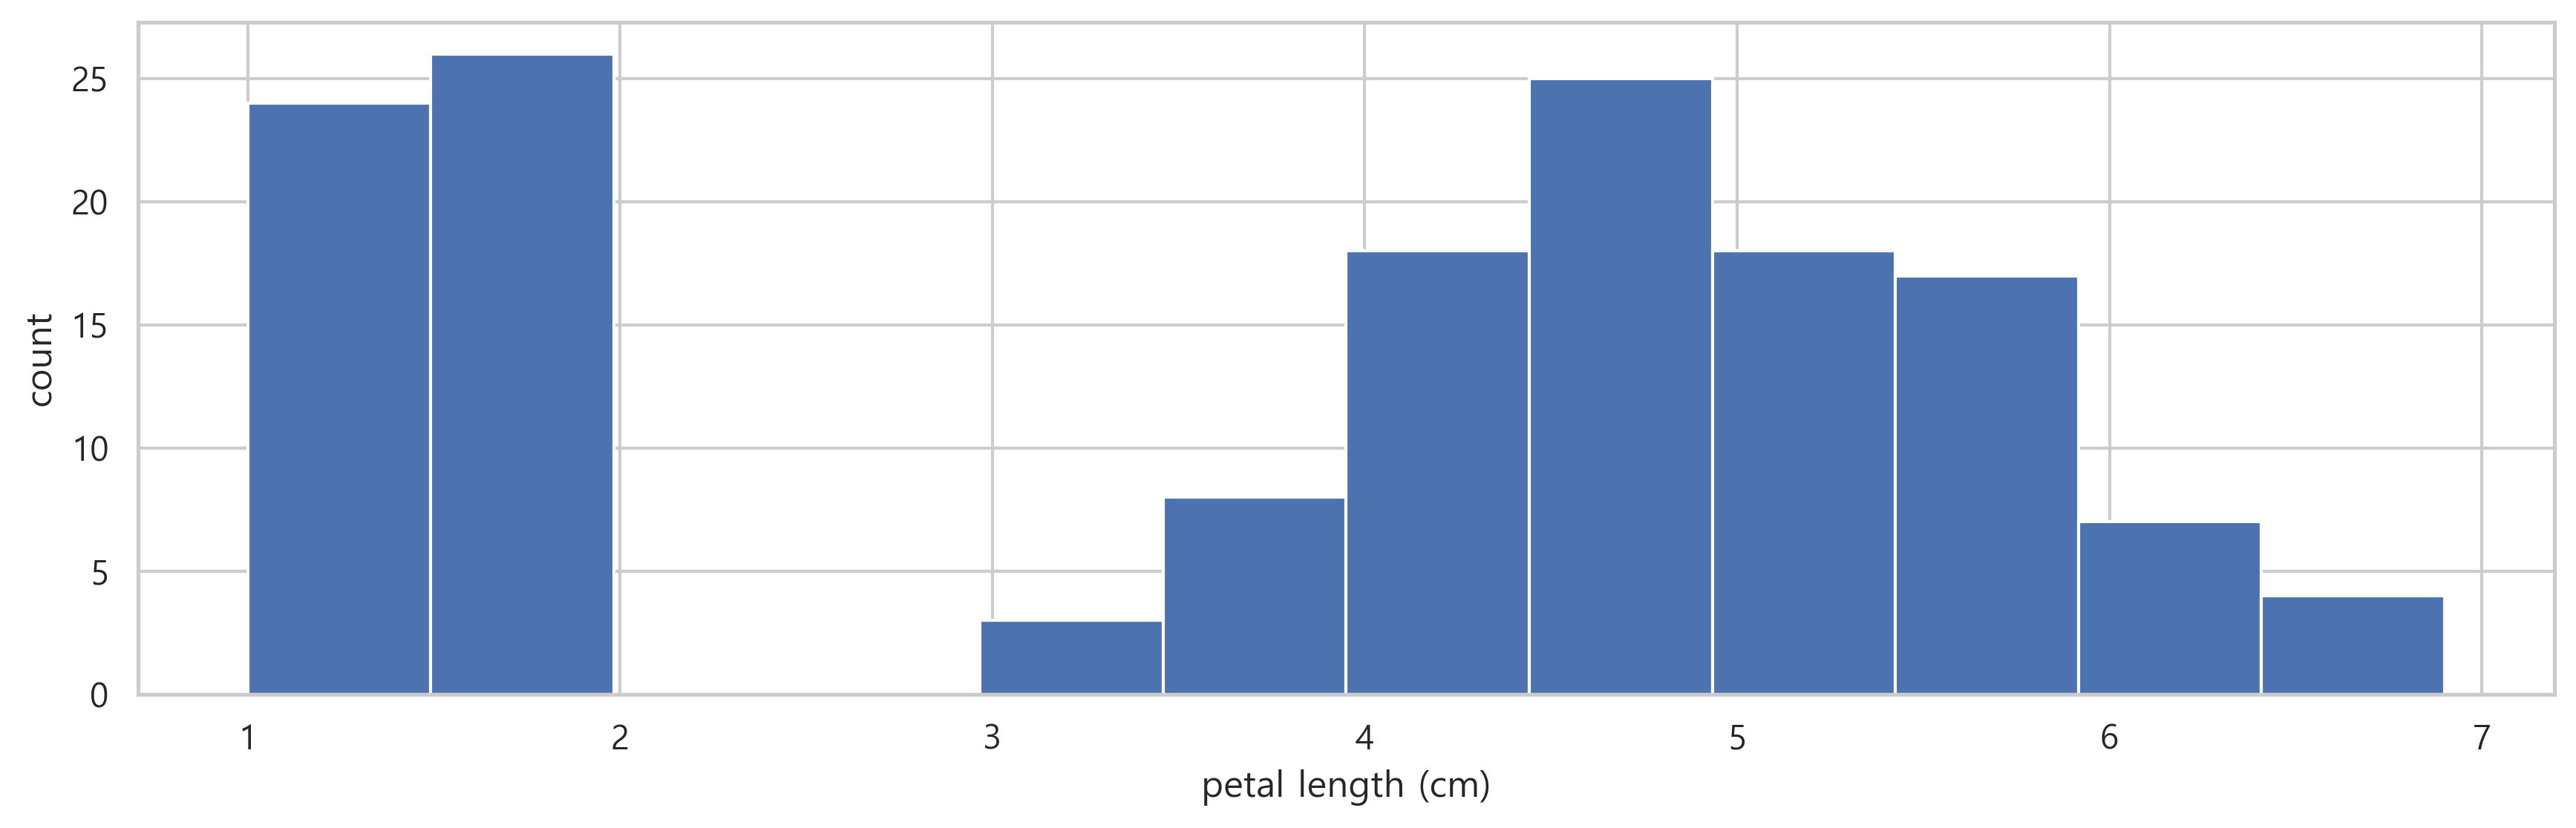

In [42]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(df['petal length (cm)'])

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(df['petal length (cm)'],bins= n_bins )

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

- swarm

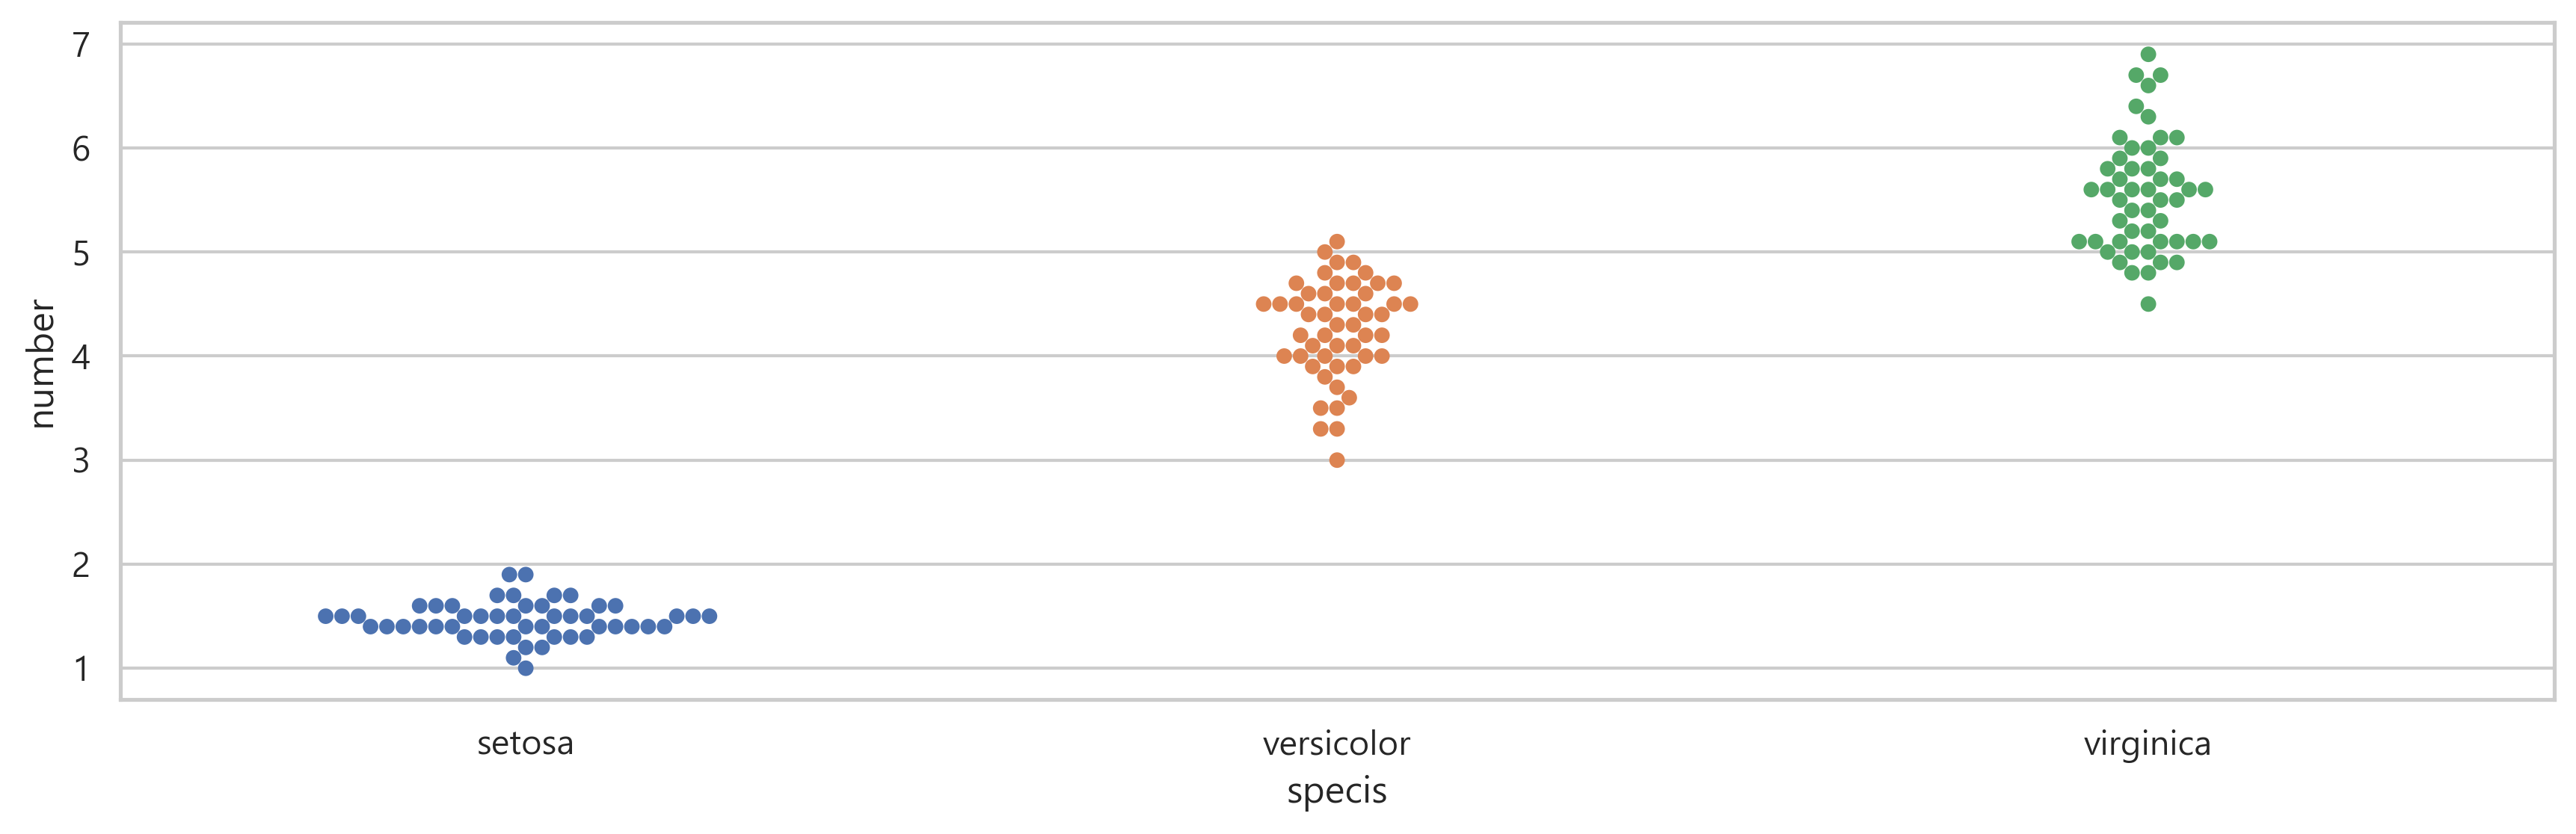

In [44]:
# Create bee swarm plot with Seaborn's default settings
import seaborn as sns

_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)
_ = plt.xlabel('specis')
_ = plt.ylabel('number')

# Show the plot
plt.show()

- ECDF

In [45]:
import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [46]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [48]:
df.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [51]:
setosa_petal_length = df[df.species == 'setosa']['petal length (cm)']
versicolor_petal_length = df[df.species == 'versicolor']['petal length (cm)']
virginica_petal_length = df[df.species == 'virginica']['petal length (cm)']

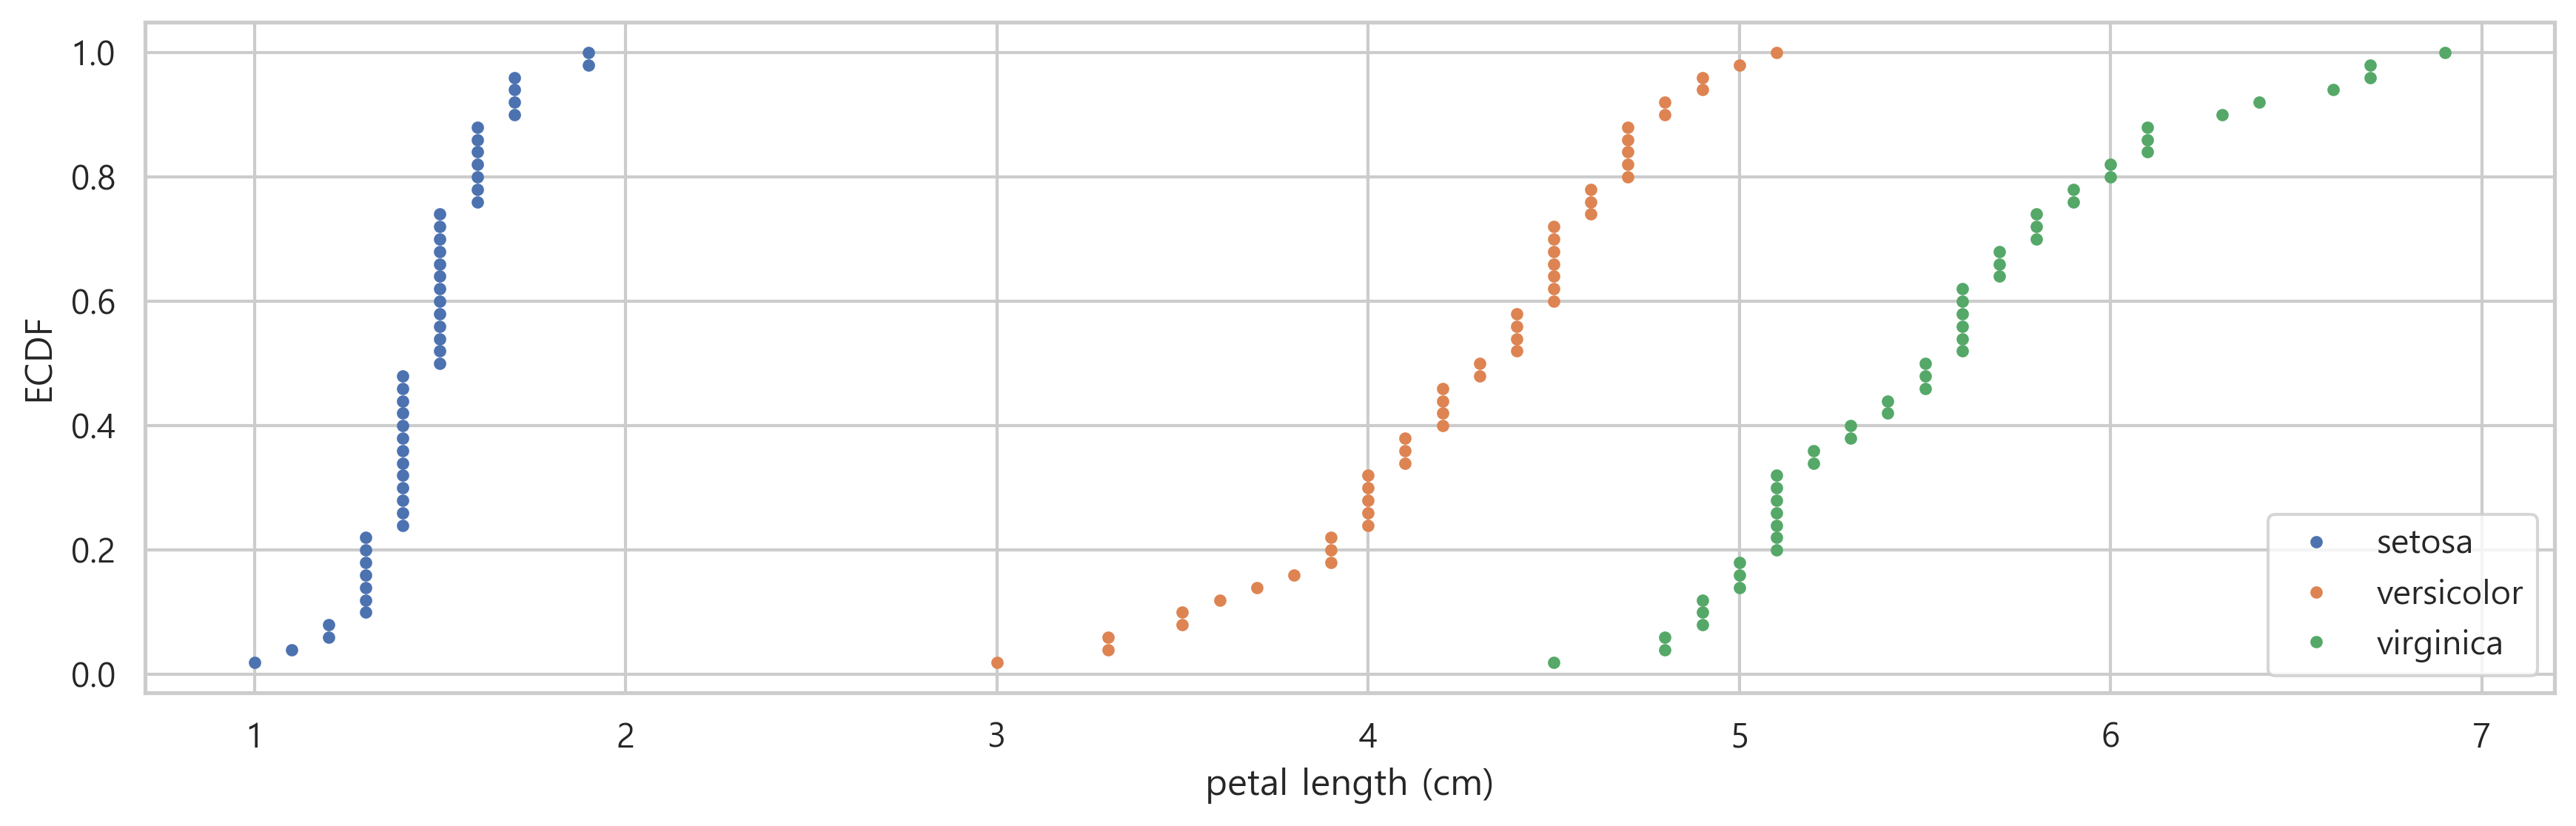

In [52]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker = '.', linestyle = 'none')
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.plot(x_virg, y_virg, marker = '.', linestyle = 'none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()